# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name:SWATHI SHANAM

ID: 1002023662

Team Mate name :MEGHANA RAMIDI, MANIKANTA BHAVANAM

ID:  1002036880, 1002039918

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files(clustering.csv and college.csv).<br>
Output variable for clustering.csv - Class (<=50K and >50K)<br>
Output variable for college.csv - Grad.Rate (<=50 and >50k)<br>

You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from google.colab import drive



## Required Python Packages 

In [3]:
  #Import required Python Packages here
  #Seaborn, numpy,pandas,sklearn,matplotlib only
  #Import required python packages here
  #Seaborn,numpy,pandas,sklearn,matplotlib only
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.cluster import KMeans
  from sklearn import preprocessing
  from sklearn.metrics import classification_report
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from google.colab import files
  uploaded = files.upload()
  
  
  

Saving College.csv to College.csv


In [4]:
   # loading clustering adult data set and changing '?' value to 'na' and droping 'na'
   df_data = pd.read_csv('College.csv', na_values='?')
   df_data = df_data.dropna()
   df_data.rename(columns={'Unnamed: 0':'University'},  inplace= True)
   df_data.head(7)

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63


# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

1 : 512.59
2 : 315.13
3 : 247.89
4 : 226.97
5 : 207.3
6 : 188.55
7 : 178.06
8 : 169.67
9 : 164.14
10 : 158.79


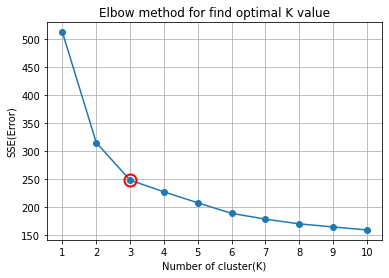

From the above graph, Optimal K value is 3


In [5]:
#########################begin code for Task 1-a
# using the label encoder we have converted the column of datatype string to class of intergers

df_data.loc[ df_data['Accept'] <= 3000, 'Accept'] = 0
df_data.loc[df_data['Accept'] > 3000, 'Accept'] = 1

label_encoder = preprocessing.LabelEncoder()

df_data['University']= label_encoder.fit_transform(df_data['University'])
df_data['Private']= label_encoder.fit_transform(df_data['Private'])

# dropped duplicates
df_data.apply(lambda col: col.drop_duplicates().reset_index(drop=True)) 

# dropping the column class rest are assigned to X and Y is assigned with 'Class'

X = df_data.drop(['Accept'], axis=1)
Y = df_data['Accept']

# normalization of entire dataset
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

# Finding the optimal K using elbow method by calculating the sum of square errors
sse = {}
range_values = range(1, 11)
for k in range_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    clusters_labels_ = kmeans.labels_
    sse[k] = kmeans.inertia_
# printing values of SSE for different values of K
for key,val in sse.items():
    print(str(key)+' : '+str(round(val,2)))
    
# plotting the SSE values for different values of K
plt.plot(list(sse.keys()), list(sse.values()), marker = 'o')
plt.xticks(range(1,11))
plt.xlabel('Number of cluster(K)')
plt.ylabel('SSE(Error)')
plt.title('Elbow method for find optimal K value')

# showing that for K =3 the optimal occures
plt.plot(3, sse[3], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid('True')
plt.show() 
    
print('From the above graph, Optimal K value is 3')



### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [6]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!
x_train,x_test, y_train, y_test= train_test_split(X,Y,test_size=0.3, random_state=2022)
###################end code for Task 1-b-1

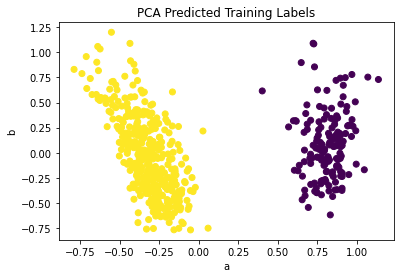

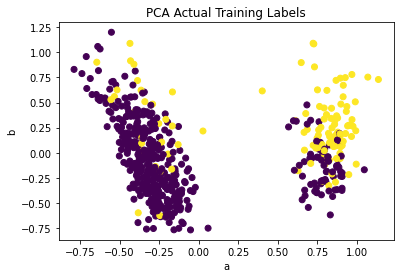

In [7]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
kmeans = KMeans(n_clusters=2, max_iter=1000)

# Compute cluster centers and predict cluster index for each sample 
# fit_predict will Compute cluster centers and predict cluster index for each sample.
kmeans_fit_centers_index = kmeans.fit_predict(x_train)

# Model and fit the data to the PCA model
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(a, b, your_data)
a = X_train_pca[:, 0]
b = X_train_pca[:, 1]

# plotting predicted training labels.
plt.scatter(a, b, c=kmeans_fit_centers_index)
plt.title("PCA Predicted Training Labels")
plt.xlabel('a')
plt.ylabel('b')
plt.show()

# plotting actual training labels.
plt.scatter(a,b,c=y_train)
plt.title("PCA Actual Training Labels")
plt.xlabel('a')
plt.ylabel('b')
plt.show()

###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

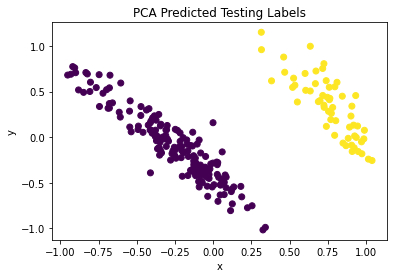

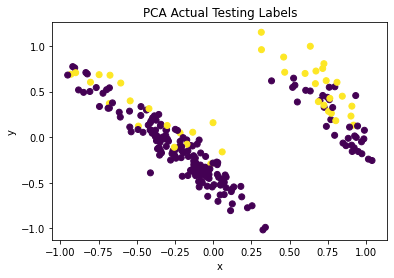

In [15]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
kmeans_fit_centers_index_test = kmeans.fit_predict(x_test)

# Model and fit the data to the PCA model
X_test_pca = pca.fit_transform(x_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(a, b, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

# plotting predicted testing labels.
plt.scatter(x,y, c=kmeans_fit_centers_index_test)
plt.title("PCA Predicted Testing Labels")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# plotting actual testing labels.
plt.scatter(x,y,c=y_test)
plt.title("PCA Actual Testing Labels")
plt.xlabel('x')
plt.ylabel('y')
plt.show()




###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [16]:
###################begin code for Task 1-b-4: Print out a confusion matrix
kmeans_confusion_matrix= confusion_matrix(y_test, kmeans_fit_centers_index_test)

print("KMeans confusion matrix:\n", kmeans_confusion_matrix)


###################end code for Task 1-b-4

KMeans confusion matrix:
 [[158  36]
 [ 18  22]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [17]:
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = x_train
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
clustering_cosine_complete =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='complete').fit_predict(cosine_distance)
f1_cosine_complete = f1_score(y_train,clustering_cosine_complete)
clustering_cosine_confusion_matrix = confusion_matrix(y_train,clustering_cosine_complete)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
clustering_euclidean_complete =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='complete').fit_predict(euclidean_distance)
f1_euclidean_complete = f1_score(y_train,clustering_euclidean_complete)
clustering_euclidean_confusion_matrix = confusion_matrix(y_train,clustering_euclidean_complete)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
clustering_manhattan_complete =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='complete').fit_predict(manhattan_distance)
f1_manhattan_complete = f1_score(y_train,clustering_manhattan_complete)
clustering_manhattan_confusion_matrix = confusion_matrix(y_train,clustering_manhattan_complete)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
clustering_cosine_average =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='average').fit_predict(cosine_distance)
f1_cosine_average = f1_score(y_train,clustering_cosine_average)
clustering_cosine_avg_confusion_matrix = confusion_matrix(y_train,clustering_cosine_average)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
clustering_euclidean_average =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='average').fit_predict(euclidean_distance)
f1_euclidean_average = f1_score(y_train,clustering_euclidean_average)
clustering_euclidean_avg_confusion_matrix = confusion_matrix(y_train,clustering_euclidean_average)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
clustering_manhattan_average =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='average').fit_predict(manhattan_distance)
f1_manhattan_average = f1_score(y_train,clustering_manhattan_average)
clustering_manhattan_avg_confusion_matrix = confusion_matrix(y_train,clustering_manhattan_average)

print("Confusion Matrix for complete linkage + cosine\n", clustering_cosine_confusion_matrix)
print("Confusion Matrix for complete linkage + euclidean\n", clustering_euclidean_confusion_matrix)
print("Confusion Matrix for complete linkage + manhattan\n", clustering_manhattan_confusion_matrix)
print("Confusion Matrix for average linkage + cosine\n", clustering_cosine_avg_confusion_matrix)
print("Confusion Matrix for average linkage + euclidean\n", clustering_euclidean_avg_confusion_matrix)
print("Confusion Matrix for average linkage + manhattan\n", clustering_manhattan_avg_confusion_matrix)



print("F1-score for complete linkage + cosine", f1_cosine_complete)
print("F1-score for complete linkage + euclidean", f1_euclidean_complete)
print("F1-score for complete linkage + manhattan", f1_manhattan_complete)
print("F1-score for average linkage + cosine", f1_cosine_average)
print("F1-score for average linkage + euclidean", f1_euclidean_average)
print("F1-score for average linkage + manhattan", f1_manhattan_average)



Confusion Matrix for complete linkage + cosine
 [[ 71 361]
 [ 83  28]]
Confusion Matrix for complete linkage + euclidean
 [[361  71]
 [ 28  83]]
Confusion Matrix for complete linkage + manhattan
 [[361  71]
 [ 28  83]]
Confusion Matrix for average linkage + cosine
 [[431   1]
 [111   0]]
Confusion Matrix for average linkage + euclidean
 [[431   1]
 [111   0]]
Confusion Matrix for average linkage + manhattan
 [[425   7]
 [105   6]]
F1-score for complete linkage + cosine 0.11200000000000002
F1-score for complete linkage + euclidean 0.6264150943396226
F1-score for complete linkage + manhattan 0.6264150943396226
F1-score for average linkage + cosine 0.0
F1-score for average linkage + euclidean 0.0
F1-score for average linkage + manhattan 0.0967741935483871


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

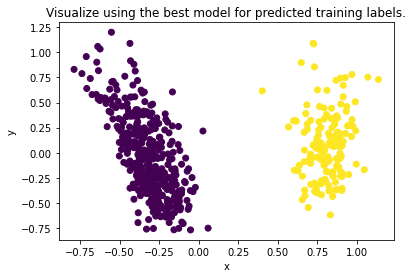

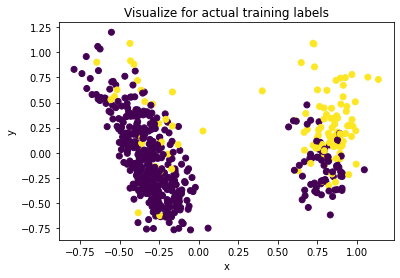

In [18]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels

## to find the best model from the above AgglomerativeClustering F1 score we created a model as below
models = {'clustering_cosine_complete':f1_cosine_complete,'clustering_euclidean_complete':f1_euclidean_complete,'clustering_manhattan_complete':f1_manhattan_complete,'clustering_cosine_average':f1_cosine_average,'clustering_euclidean_average':f1_euclidean_average,'clustering_manhattan_average':f1_manhattan_average}

# first we found the maximun value from all F1 score
best_model_val = max(models,key=models.get)

# then we found which F1 score that maximum values belongs to
if best_model_val == 'clustering_cosine_complete':
    best_model = clustering_cosine_complete

elif best_model_val == 'clustering_euclidean_complete':
    best_model = clustering_euclidean_complete

elif best_model_val == 'clustering_manhattan_complete':
    best_model = clustering_manhattan_complete

elif best_model_val == 'clustering_cosine_average':
    best_model = clustering_cosine_average

elif best_model_val == 'clustering_euclidean_average':
    best_model = clustering_euclidean_average

elif best_model_val == 'clustering_manhattan_average':
    best_model = clustering_manhattan_average

else:
    best_model = None

#  Finding PCA for x_train samples 
X_train_pca = PCA(n_components=2).fit_transform(x_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:,0]
y = X_train_pca[:,1]

# plotting predicted training labels.
plt.scatter(x,y,c=best_model)
plt.title("Visualize using the best model for predicted training labels.")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# plotting actual training labels.
plt.scatter(x,y,c=y_train)
plt.title("Visualize for actual training labels")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
###################end code for Task 2-a

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

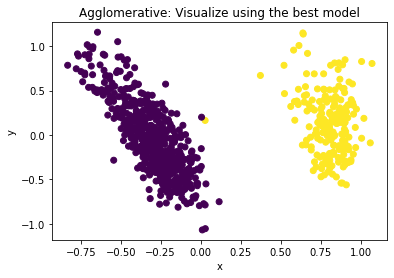

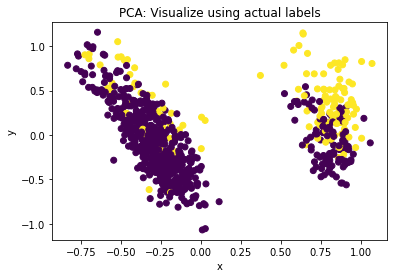

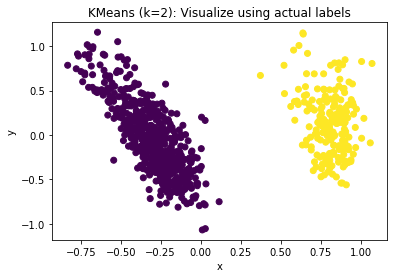

In [19]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeans = KMeans(n_clusters=2, max_iter=1000) 
kmeans_fit_centers_index = kmeans.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = X
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
clustering_cosine_complete =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='complete').fit_predict(cosine_distance)
f1_cosine_complete = f1_score(Y,clustering_cosine_complete)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
clustering_euclidean_complete =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='complete').fit_predict(euclidean_distance)
f1_euclidean_complete = f1_score(Y,clustering_euclidean_complete)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
clustering_manhattan_complete =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='complete').fit_predict(manhattan_distance)
f1_manhattan_complete = f1_score(Y,clustering_manhattan_complete)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
clustering_cosine_average =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='average').fit_predict(cosine_distance)
f1_cosine_average = f1_score(Y,clustering_cosine_average)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
clustering_euclidean_average =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='average').fit_predict(euclidean_distance)
f1_euclidean_average = f1_score(Y,clustering_euclidean_average)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
clustering_manhattan_average =AgglomerativeClustering(n_clusters =2, affinity ='precomputed',linkage='average').fit_predict(manhattan_distance)
f1_manhattan_average = f1_score(Y,clustering_manhattan_average)

## to find the best model from the above AgglomerativeClustering F1 score we created a model as below
models = {'clustering_cosine_complete':f1_cosine_complete,'clustering_euclidean_complete':f1_euclidean_complete,'clustering_manhattan_complete':f1_manhattan_complete,'clustering_cosine_average':f1_cosine_average,'clustering_euclidean_average':f1_euclidean_average,'clustering_manhattan_average':f1_manhattan_average}

# first we found the maximun value from all F1 score
best_model_val = max(models,key=models.get)


# then we found which F1 score that maximum values belongs to
if best_model_val == 'clustering_cosine_complete':
    best_model = clustering_cosine_complete

elif best_model_val == 'clustering_euclidean_complete':
    best_model = clustering_euclidean_complete

elif best_model_val == 'clustering_manhattan_complete':
    best_model = clustering_manhattan_complete

elif best_model_val == 'clustering_cosine_average':
    best_model = clustering_cosine_average

elif best_model_val == 'clustering_euclidean_average':
    best_model = clustering_euclidean_average

elif best_model_val == 'clustering_manhattan_average':
    best_model = clustering_manhattan_average

else:
    best_model = None

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_pca[:,0]
y = X_pca[:,1]

# plotting best model using predicted training labels
plt.scatter(x,y,c=best_model)
plt.title("Agglomerative: Visualize using the best model")
plt.xlabel('x')
plt.ylabel('y')
plt.show()




### Visualize Clusters
#  Model and fit the data to the PCA model

# plotting PCA using whole actual labels
x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y,c=Y)
plt.title("PCA: Visualize using actual labels")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
x = X_pca[:,0]
y = X_pca[:,1]

# plotting KMeans using using the best model
plt.scatter(x,y,c=kmeans_fit_centers_index)
plt.title("KMeans (k=2): Visualize using actual labels")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [20]:
###################begin code for Task 3-b


print("Confusion matrix\n")
kmeans_confusion = confusion_matrix(Y,kmeans_fit_centers_index)
Agglomerative_confusion = confusion_matrix(Y,best_model)
print("Kmeans: \n", kmeans_confusion)
print("\nAgglomerative: \n", Agglomerative_confusion)

print("\nPrecision\n")
kmeans_precision = precision_score(Y,kmeans_fit_centers_index)
Agglomerative_precision = precision_score(Y,best_model)
print("Kmeans: \n", kmeans_precision)
print("\nAgglomerative: \n", Agglomerative_precision)


print("\nRecall\n")
kmeans_recall = recall_score(Y,kmeans_fit_centers_index)
Agglomerative_recall = recall_score(Y,best_model)
print("Kmeans: \n", kmeans_recall)
print("\nAgglomerative: \n", Agglomerative_recall)


print("\nF1 Score\n")
kmeans_score = f1_score(Y,kmeans_fit_centers_index)
Agglomerative_score = f1_score(Y,best_model)
print("Kmeans: \n", kmeans_score)
print("\nAgglomerative: \n", Agglomerative_score)

print("\n \n Comparing Precision, Recall and F1 score for Kmeans and Agglomerative  we see that they are almost same"+
      " but Precision and F1 score for Agglomerative are slightly higher than compared to K Means and Recall for K means "+
      "is slightly lower than Agglomerative.")



###################end code for Task 3-b

Confusion matrix

Kmeans: 
 [[519 107]
 [ 46 105]]

Agglomerative: 
 [[519 107]
 [ 45 106]]

Precision

Kmeans: 
 0.49528301886792453

Agglomerative: 
 0.49765258215962443

Recall

Kmeans: 
 0.695364238410596

Agglomerative: 
 0.7019867549668874

F1 Score

Kmeans: 
 0.5785123966942148

Agglomerative: 
 0.5824175824175825

 
 Comparing Precision, Recall and F1 score for Kmeans and Agglomerative  we see that they are almost same but Precision and F1 score for Agglomerative are slightly higher than compared to K Means and Recall for K means is slightly lower than Agglomerative.


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining both the assignment and it's implementation.


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points